# Jupyter demonstration

### Features

- web-based interactive platform
- python
    - data analysis
    - plotting
- other programming languages
    - perl
    - R
    - c/c++
    - many other
- command line
- **markup text**

## Simple code

#### Interactive nature of Jupyter notebooks

In [1]:
print("Hello world")

Hello world


In [2]:
s = 0
for i in range(1,11):
    s+=i
    print('current number', i, 'current sum', s)

current number 1 current sum 1
current number 2 current sum 3
current number 3 current sum 6
current number 4 current sum 10
current number 5 current sum 15
current number 6 current sum 21
current number 7 current sum 28
current number 8 current sum 36
current number 9 current sum 45
current number 10 current sum 55


In [3]:
import numpy as np
data = np.loadtxt('data.csv', delimiter=',')
x,y = data
data.shape # 2D array

(2, 51)

### Simple visualization

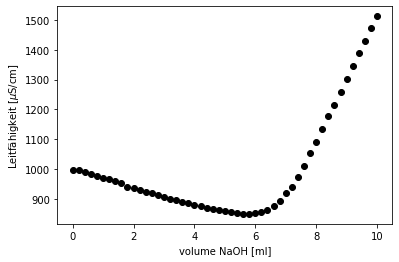

In [4]:
from matplotlib import pyplot as plt
plt.scatter(x, y, color = 'k')
_temp = plt.xlabel('volume NaOH [ml]')
_temp = plt.ylabel(r'Leitfähigkeit [$\mu$S/cm]')

### More complex plot

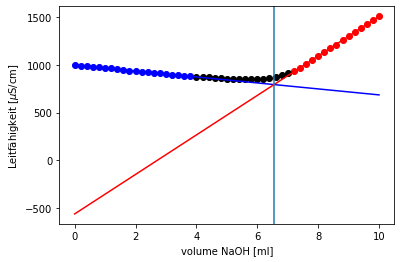

In [5]:
from scipy import stats
from scipy.stats import linregress

def get_y(k, l, x):
    return x*k + l


num_points1 = 20
slope1, intercept1, r_value, p_value, std_err = stats.linregress(x[:num_points1],y[:num_points1])
plt.scatter(x[:num_points1],y[:num_points1], color = 'b')
plt.plot(x,get_y(slope1, intercept1, x), color = 'b')
_temp = plt.xlabel('volume NaOH [ml]')
_temp = plt.ylabel(r'Leitfähigkeit [$\mu$S/cm]')
num_points2 = 15
slope2, intercept2, r_value, p_value, std_err = stats.linregress(x[-num_points2:],y[-num_points2:])
plt.scatter(x[-num_points2:],y[-num_points2:], color = 'r')
plt.scatter(x[num_points1:-num_points2],y[num_points1:-num_points2], color = 'k')
plt.plot(x,get_y(slope2, intercept2, x), color = 'r')
_temp = plt.xlabel('volume NaOH [ml]')
_temp = plt.ylabel(r'Leitfähigkeit [$\mu$S/cm]')
x_int = (intercept2 - intercept1) / (slope1 - slope2)
_temp = plt.axvline(x=x_int)


### More complex data structures (Tables)

In [6]:
import pandas as pd
covid_df = pd.read_csv('CovidFaelle_Timeline.csv', sep=';')
covid_df.head()

,Time,Bundesland,BundeslandID,AnzEinwohner,AnzahlFaelle,AnzahlFaelleSum,AnzahlFaelle7Tage,SiebenTageInzidenzFaelle,AnzahlTotTaeglich,AnzahlTotSum,AnzahlGeheiltTaeglich,AnzahlGeheiltSum
0,26.02.2020 00:00:00,Burgenland,1,294436,0,0,0,0,0,0,0,0
1,26.02.2020 00:00:00,Kärnten,2,561293,0,0,0,0,0,0,0,0
2,26.02.2020 00:00:00,Niederösterreich,3,1684287,0,0,0,0,0,0,0,0
3,26.02.2020 00:00:00,Oberösterreich,4,1490279,0,0,0,0,0,0,0,0
4,26.02.2020 00:00:00,Salzburg,5,558410,0,0,0,0,0,0,0,0


In [7]:
covid_df = covid_df[covid_df.Bundesland == 'Österreich']
covid_df.Time = pd.to_datetime(covid_df.Time, yearfirst = True, dayfirst = True)
covid_df = covid_df.set_index('Time')
covid_df = covid_df[['AnzahlFaelle', 'AnzahlTotTaeglich', 'AnzahlGeheiltTaeglich']]
covid_df.columns = ['cases', 'deaths', 'recovered']
covid_df

,cases,deaths,recovered
Time,,,
2020-02-26,1,0,0
2020-02-27,2,0,0
2020-02-28,4,0,0
2020-02-29,1,0,0
2020-03-01,4,0,0
...,...,...,...
2021-05-12,1009,19,2067
2021-05-13,857,11,1840
2021-05-14,653,5,1817


<AxesSubplot:xlabel='Time'>

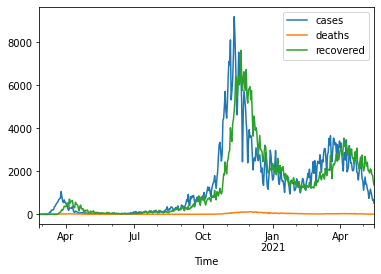

In [8]:
covid_df.plot() # simple plot

<AxesSubplot:xlabel='Time'>

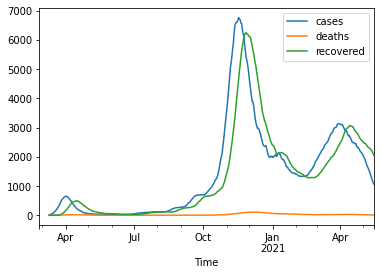

In [9]:
#covid_df.resample('W').mean().plot() # weekly average
covid_df.rolling(14).mean().plot() # rolling average - 2 week incidence

## Command line

In [10]:
!ls

apt.txt			  data.csv    environment.yml
CovidFaelle_Timeline.csv  demo.ipynb  postBuild
